# ___________________ Movie Recommender System___________________
<img src="logo.png" alt="logo" width="500" height="500" align="centre">

<a id="cont"></a>

## Table of Content

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Libraries</a>

<a href=#three>3. Comet</a>

<a href=#four>4. Loading and inspecting the data</a>

<a href=#five>5. Exploratory Data Analysis</a>

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Model Training and Evaluation</a>

<a href=#eight>8. Model Testing</a>

<a href=#nine>9. Saving The Model For Kaggle Submission</a>

<a href=#ten>10. Saving The Models For Streamlit App</a>

<a href=#eleven>11. Conclusion</a>

<a href=#twelve>12. Recommendations</a>

<a href=#thirteen>13 Reference Links</a>

 <a id="one"></a>
## 1. Introduction 
<a href=#cont>Back to Table of Contents</a>

In this FSC_TECH Movie Recommender System notebook, we embark on an exciting journey to build a personalized recommendation engine that caters to the unique preferences of our esteemed customers. Leveraging data-driven insights from historical user interactions, such as ratings and reviews, we aim to create meaningful connections between users and a vast array of movies available. Our focus will be on using cutting-edge machine learning techniques, including collaborative filtering, content-based filtering, and matrix factorization, to generate accurate and relevant movie recommendations. 

By exploring hybrid approaches and following a systematic approach that includes data preprocessing, model selection, hyperparameter tuning, and thorough evaluation, we ensure the success and precision of our recommender system. Upholding user privacy and data security is a priority, and we are committed to adhering to ethical standards to maintain user trust and confidence in our platform. Join us as we create a truly personalized and delightful movie-watching experience!

<a id="two"></a>
## 2. Importing Libraries
<a href=#cont>Back to Table of Content

Python libraries are pre-written code modules that provide a wide range of functionalities, allowing developers to easily incorporate specific features into their Python projects. These libraries serve as powerful tools that simplify complex tasks, promote code reuse, and enhance productivity. Here's a brief summary of some popular Python libraries we will be using:

- **NumPy:** NumPy is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to perform operations efficiently.

- **Pandas:** Pandas is a versatile library for data manipulation and analysis. It introduces the DataFrame data structure, which enables easy handling and manipulation of structured data, such as CSV files or database tables.

- **Matplotlib:** Matplotlib is a comprehensive plotting library that allows the creation of static, animated, and interactive visualizations. It provides a wide variety of plots, including line plots, bar charts, scatter plots, histograms, and more.

- **Scikit-learn:** Scikit-learn is a powerful machine learning library that provides a wide range of algorithms and tools for tasks such as classification, regression, clustering, and dimensionality reduction. It also offers utilities for model evaluation and data preprocessing.

- **Surprise:** is an open-source Python library designed for building and evaluating recommendation systems. It provides various algorithms for collaborative filtering, matrix factorization, and other recommendation techniques.

- **Comet_ml:** Comet_ml is a cloud-based machine learning platform that allows data scientists and researchers to track, compare, explain and optimize experiments and models across the entire machine learning lifecycle

- **pickle:** is used for serializing and deserializing Python objects. Serialization is the process of converting a Python object into a byte stream, allowing it to be stored in a file or sent over a network. Deserialization, on the other hand, is the process of reconstructing the original Python object from the serialized byte stream.

In [0]:
# Install packages here

# Package we need fore Comet
from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model

# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Package for timing code
import timeit


# Packages for visualization
import matplotlib
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")


# Packages for modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Reader
from surprise import Dataset
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD,NormalPredictor
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering,BaselineOnly
from sklearn.neighbors import  NearestNeighbors
import heapq

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Packages for Randomisation
import random
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (12,8)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

C:\Users\fuman\AppData\Local\Temp\ipykernel_15160\1786698148.py:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-pastel')


<a id="three"></a>
## 3. Comet
<a href=#cont>Back to Table of Contents</a>

Comet is a machine learning experimentation platform that helps data scientists track, compare, and optimize their machine learning models. It provides a centralized platform for managing and organizing experiments, enabling collaboration and reproducibility.

Comet allows users to log and visualize various aspects of their machine learning experiments, including hyperparameters, metrics, code versions, and data visualizations. It offers integrations with popular machine learning libraries such as scikit-learn, making it easy to capture and log relevant information during the model development process.

In [3]:
import os

# Replace 'path/to/your/git/repository' with the actual path of your Git repository
git_directory = 'path/to/your/git/repository'

# Set the COMET_GIT_DIRECTORY environment variable
os.environ['COMET_GIT_DIRECTORY'] = git_directory

In [4]:
#Define Comet experiment parameters

experiment = Experiment(
  api_key = "SGY0M6cZRUEOEOOV5TcTkGRmC",
  project_name = "2301acdc-teambm5",
  workspace="fumani-thibela")

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/fumani-thibela/2301acdc-teambm5/9e08af7d2f1346c19961c6aba75dca38
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: Not all initial data has been logged for experiment 9e08af7d2f1346c19961c6aba75dca38, call Experiment.end() to ensure that all data to have been logged
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exit

<a id="four"></a>
## 4. Loading and inspecting the data
<a href=#cont>Back to Table of Contents

Here we load our dataset to the notebook using the pd.read_csv, which loads the csv files to the notebook and then take a look on the shape of the dataset using the .shape attribute, which gives the number of rows and columns, (rows, columns) in this format

We have the following datasets loaded below:
* **genome_scores.csv** - a score mapping the strength between movies and tag-related properties.
* **genome_tags.csv** - user assigned tags for genome-related scores.
* **imdb_data.csv** - Additional movie metadata scraped from IMDB using the links.csv file.
* **links.csv** - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* **sample_submission.csv** - Sample of the submission format for the hackathon.
* **tags.csv** - User assigned for the movies within the dataset.
* **movies.csv** - Movie information is contained in this file
* **test.csv** - The test split of the dataset. Contains user and movie IDs with no rating data.
* **train.csv** - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [5]:
train_df = pd.read_csv("dataset/train.csv")

In [6]:
train_df.shape

(10000038, 4)

In [7]:
test_df = pd.read_csv("dataset/test.csv")
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [8]:
test_df.shape

(5000019, 2)

In [9]:
tags_df = pd.read_csv("dataset/tags.csv")

In [10]:
tags_df.shape

(1093360, 4)

In [11]:
genome_scores_df = pd.read_csv("dataset/genome_scores.csv")

In [12]:
genome_scores_df.shape

(15584448, 3)

In [13]:
genome_tags_df = pd.read_csv("dataset/genome_tags.csv")

In [14]:
genome_tags_df.shape

(1128, 2)

In [15]:
imdb_df = pd.read_csv("dataset/imdb_data.csv")

In [16]:
imdb_df.shape

(27278, 6)

In [17]:
links_df = pd.read_csv("dataset/links.csv")

In [18]:
links_df.shape

(62423, 3)

In [104]:
movies_df = pd.read_csv("dataset/movies.csv")

In [105]:
movies_df.shape

(62423, 3)

<a id="five"></a>
## 5. Exploratory Data Analysis
<a href=#cont>Back to Table of Contents</a>

EDA, or Exploratory Data Analysis, is a fundamental step in the data analysis process that aims to understand the underlying patterns, relationships, and characteristics of a dataset. It involves visualizing and summarizing the data to gain insights, detect patterns, identify outliers, and formulate hypotheses before applying any statistical modeling or machine learning techniques.

EDA serves as a crucial starting point in the data analysis workflow, aiding analysts in making informed decisions about data cleaning, feature selection, and model building to extract meaningful and actionable insights from the data.

Firstly let us get to understand out dataset, in this section we will use the following attributes:

- **.info():** This method provides a concise summary of the DataFrame, including the data types of columns, the number of non-null values, and memory usage.
- **.head():** This method is used to display the first few rows of the DataFrame. By default, it shows the first 5 rows, but you can specify the number of rows to display within the parentheses.
- **.isnull().sum():** This combination of methods is used to count the number of missing (null) values in each column of the DataFrame.
- **.unique():** This method is used to get the unique values of a specific column in the DataFrame. It returns a NumPy array containing the unique elements

## Train data

Since we have already discussed what the attributes mean above, going forward will only discusse the output of each code used.

In [21]:
#This Code prints the train data that was imported in the loading data section
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


From the output above, we learn that we have 10000038 entries, and we can also see the columns and their data type on the table, lastly we learn that this dataset has a memory usage of 305.2

In [23]:
#We have a timespamp column on our dataset, but it is of no use to us in that format 
#so we are going to change this column to date and time column
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1970-01-01 00:00:01.518349992
1,106343,5,4.5,1970-01-01 00:00:01.206238739
2,146790,5459,5.0,1970-01-01 00:00:01.076215539
3,106362,32296,2.0,1970-01-01 00:00:01.423042565
4,9041,366,3.0,1970-01-01 00:00:00.833375837


Now we have the datetime column of which we believe it is the release date of a movie, then in that case we the time is not necessary to keep, therefore we are going to remove the time on the timestamp column.

In [24]:
#let's check how many users do we have
print("There are", train_df["userId"].nunique(), "users")

There are 162541 users


In [25]:
#let's check how many movies do we have
print("We have", train_df["movieId"].nunique(), "movies in our train dataset")

We have 48213 movies in our train dataset


In [26]:
#This code shows us how many rows has a null value.
train_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

We do not have any null values in our train dataset, as we can see from the results above that the sums are all 0s.

In [27]:
#This code returns the list of all the rates in the train dataset
rates = list(train_df['rating'].unique())
print(rates)

[4.0, 4.5, 5.0, 2.0, 3.0, 1.0, 3.5, 2.5, 0.5, 1.5]


The bar graph below present the dustribution of the rate scores. 

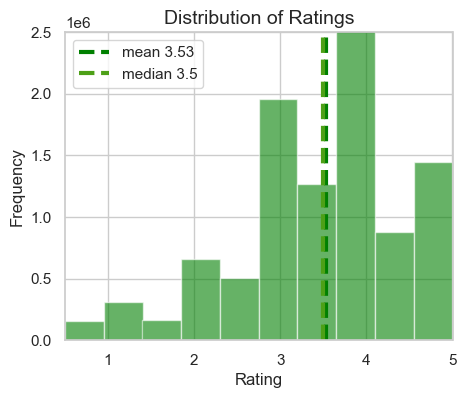

In [28]:
def ratings_distplot(df, column='rating'):
    """
    Plots the distribution of ratings in the dataset.
    
    Parameters:
    df (DataFrame): Input DataFrame containing ratings.
    column (str, optional): Name of the column in the DataFrame that contains the ratings. Default is 'rating'.
    """
    
    plt.figure(figsize=(5, 4))
    ax = sns.distplot(df[column], bins=10, kde=False, hist_kws=dict(alpha=0.6), color="green")
    mean = df[column].mean()
    median = df[column].median()
    plt.axvline(x=mean, label=f'mean {round(mean, 2)}', color='green', lw=3, ls='--')
    plt.axvline(x=median, label=f'median {median}', color='#4DA017', lw=3, ls='--')
    plt.xlim((0.5, 5))
    plt.ylim((0, 2500000))
    plt.title('Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
ratings_distplot(train_df)    

It seems like our dataset is of nice movies to watch, as we can see that a lot of movies are rated 4.0 as well as 4.5 and 5 are also high showing that more users found more movies entertaining or good to watch.

## Tags data

In [29]:
#This Code prints the tags data that was imported in the loadiing data section
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [30]:
#The .info attribute gives you the column, non-null count and datatype summary and some other interesting info
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [31]:
#This code shows us how many rows has a null value.
tags_df.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

So from the results above we learned that there are 16 null values in the tag column

In [32]:
#lets check how many unique userId do we have in our tags dataset
tags_df["userId"].nunique()

14592

In [33]:
#lets check how many unique movieId do we have in our tags dataset
tags_df["movieId"].nunique()

45251

Below is the wordcloud of our tag column, this wordcloud will present to us what tag appeared the most by print it with the biggest font size

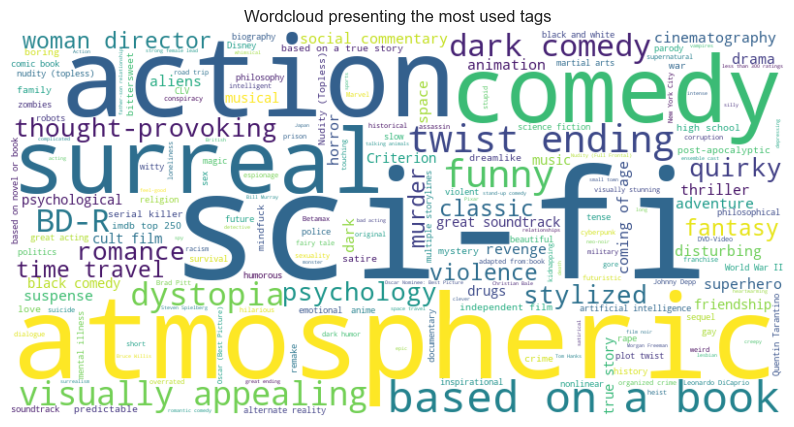

In [34]:
tags_count = pd.Series(tags_df["tag"]).value_counts()

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(tags_count)

#plot the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Wordcloud presenting the most used tags")
plt.axis("off")
plt.show()



## Genome Tags Data

In [35]:
#This Code prints the tags data that was imported in the loadiing data section
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [36]:
#The .info attribute gives you the column, non-null count and datatype summary and some other interesting info
genome_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


## IMDB Data

In [37]:
#This Code prints the tags data that was imported in the loadiing data section
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [38]:
#The .info attribute gives you the column, non-null count and datatype summary and some other interesting info
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [39]:
#This code shows us how many rows has a null value.
imdb_df.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [40]:
# Describe the runtime 
imdb_df['runtime'].describe()

count    15189.000000
mean       100.312331
std         31.061707
min          1.000000
25%         89.000000
50%         98.000000
75%        109.000000
max        877.000000
Name: runtime, dtype: float64

In [41]:
#Lets have a quick look on the rows with null values
imdb_df[imdb_df["title_cast"].isnull()]

,movieId,title_cast,director,runtime,budget,plot_keywords
109,111,NaN,NaN,NaN,NaN,NaN
140,142,NaN,NaN,NaN,NaN,NaN
152,154,NaN,NaN,NaN,NaN,NaN
197,199,NaN,NaN,NaN,NaN,NaN
257,260,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
27202,131052,NaN,NaN,NaN,NaN,NaN
27216,131082,NaN,Libby Spears,85.0,NaN,NaN
27226,131102,NaN,NaN,NaN,NaN,NaN
27227,131104,NaN,NaN,NaN,NaN,NaN


From the results above we can see that we have some other rows with null values on most of the columns, we need to do something with these rows.

<Axes: xlabel='runtime', ylabel='Density'>

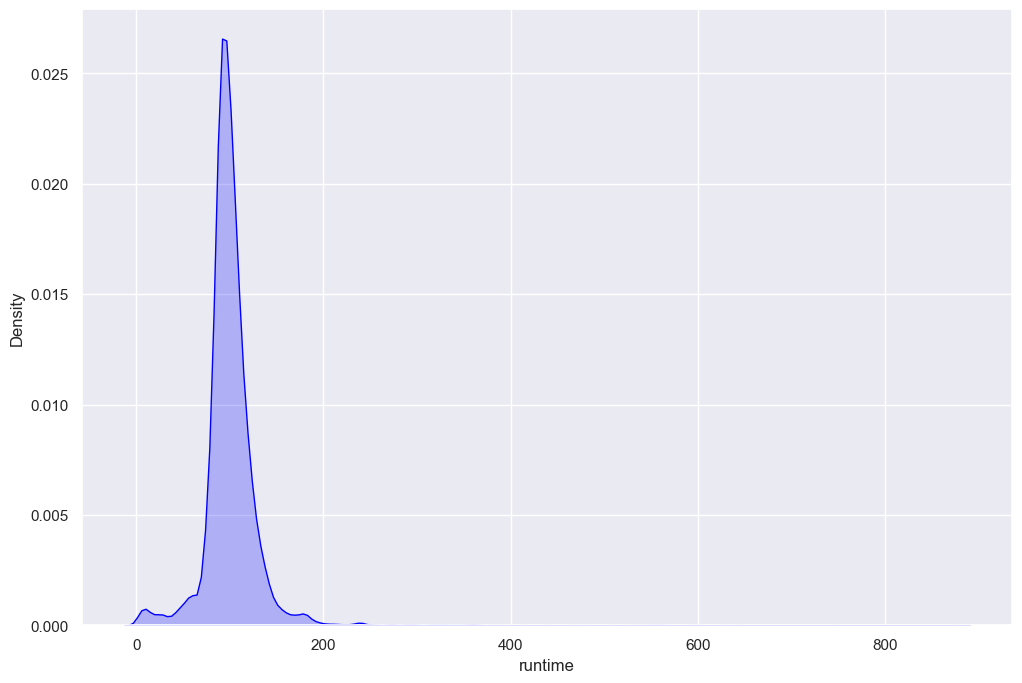

In [43]:
#Plot the Runtime
sns.set(style="darkgrid", )
sns.kdeplot(data=imdb_df['runtime'], shade=True, color='blue')

In [44]:
#Here we create a list of directors and the count of their appearences on the data
directors = imdb_df["director"].value_counts()
directors

director
See full summary       28
Woody Allen            26
Luc Besson             26
Stephen King           24
William Shakespeare    19
                       ..
Zac Stanford            1
Marc Caro               1
Megan Ambuhl Graner     1
Tahmineh Milani         1
Seong-il Cheon          1
Name: count, Length: 11786, dtype: int64

Then we us the list above to plot the wordcloud below.

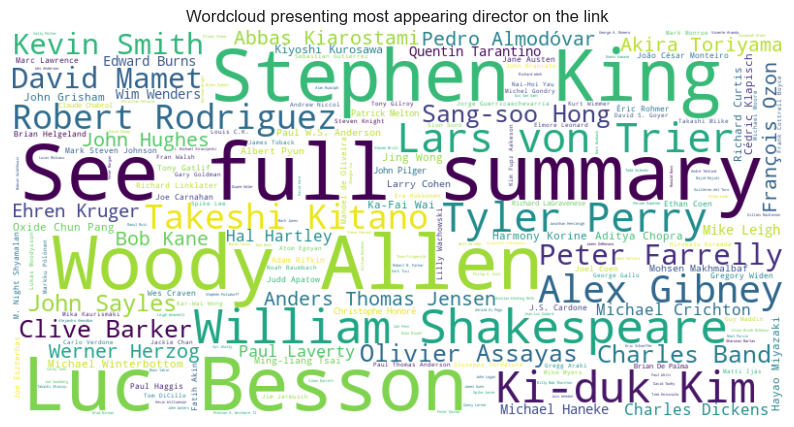

In [45]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(directors)

#plot the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Wordcloud presenting most appearing director on the link")
plt.axis("off")
plt.show()

## Movies Data

In [46]:
#This Code prints the tags data that was imported in the loadiing data section
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
from collections import Counter

distinct_words = movies_df['genres'].str.cat(sep="|").split("|")
Counter(distinct_words)



Counter({'Adventure': 4145,
         'Animation': 2929,
         'Children': 2935,
         'Comedy': 16870,
         'Fantasy': 2731,
         'Romance': 7719,
         'Drama': 25606,
         'Action': 7348,
         'Crime': 5319,
         'Thriller': 8654,
         'Horror': 5989,
         'Mystery': 2925,
         'Sci-Fi': 3595,
         'IMAX': 195,
         'Documentary': 5605,
         'War': 1874,
         'Musical': 1054,
         'Western': 1399,
         'Film-Noir': 353,
         '(no genres listed)': 5062})

Lets look at the percentage of movies rated in each category using a donot chart For more visuals, one would perhaps want to see what relationships can be infered from the data sets or what relationships could be interesting to explore. This will require some creative thinking since some key columns such as budget and runtime are missing a significant amount of data

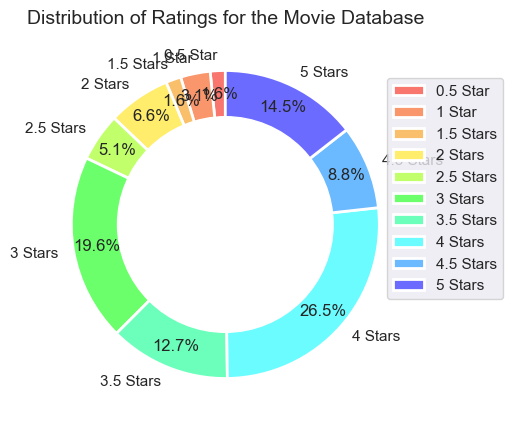

In [50]:
# Merge train with movies to join movie titles and ratings
ratings = train_df.merge(movies_df, on='movieId', how='inner')

# Count how many ratings are in each category
grouped = pd.DataFrame(ratings.groupby(['rating'])['title'].count())
grouped.rename(columns={'title': 'rating_count'}, inplace=True)

# Creating plots
fig, ax = plt.subplots(figsize=(5, 5))

# Create color palette
labels = ['0.5 Star', '1 Star', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
colors = ['#F8766D', '#F9966B', '#FABF6B', '#FFED6B', '#C1FF6B', '#6BFF6B', '#6BFFBB', '#6BFCFF', '#6BB9FF', '#6C6BFF']

# Create donut chart
donut = ax.pie(
    grouped['rating_count'],
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    pctdistance=0.85,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    startangle=90
)

# Draw a white circle at the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add a legend
ax.legend(labels, loc='upper left', bbox_to_anchor=(0.9, 0.9))

# Set title and aspect ratio
ax.set_title('Distribution of Ratings for the Movie Database', fontsize=14)
ax.set_aspect('equal')

# Display the donut chart
plt.show()

The graph presented illustrates why people tend to rate movies they enjoy. In other words, if a user dislikes a movie, it is unlikely that they will watch it entirely and provide it with a low rating.

Our exploration of the datasets does not end there. When movies are being titled, there could be a method in which movie titles are chosen in way that could result in higher rating or better responses from the audience. A word cloud can be used to show the most popular words in titles.

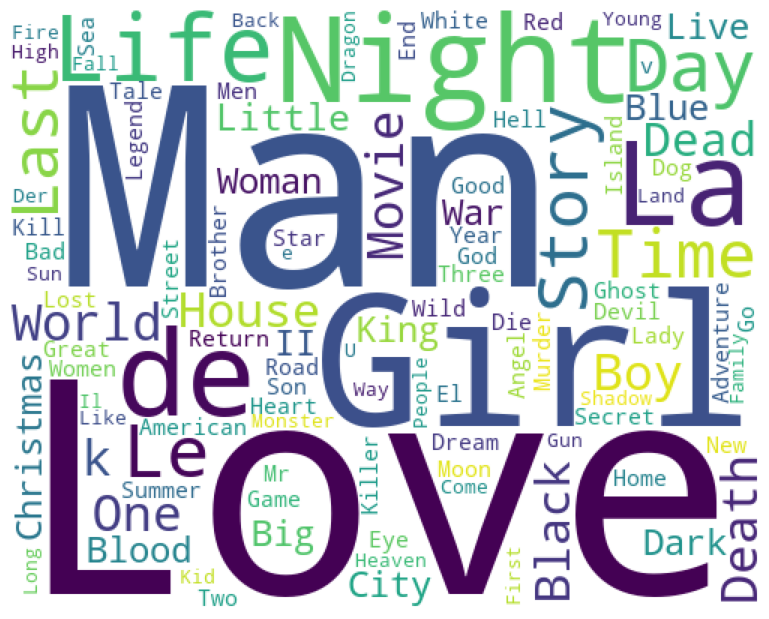

In [51]:
#create a set of english stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
#create a list of all the words in the 'title' column
words = ' '.join(movies_df['title'])
#create a wordcloud object
wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words)

# plot the wordcloud
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

From the wordcloud it becomes apparent that words like Love, Man and Girl are largly popular when naming a movie. One could, at this point only speculate as to what role naming does to the popularity of a movie. Although it can be said that the name of the movie does play an important role in being as discriptive, eye catching and as relevant as possible so as to attract the intended target market.

With the exploration of the data done as much as possibe without making any changes to the data, it's clear that few relationships can be visualised from the data. To solve this, the Data has to be cleaned and try exploring the data further.

lets now have a look at genres on the movies data, here we explore the most frequently seen genres (Modal genres)

In [52]:
def feature_frequency(df, column):
    """
    Function to count the number of occurences of metadata such as genre
    Parameters
    
    -------
        
    """
    # Creat a dict to store values
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    print('retrieving features...')
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count the number of occurences of each genre
    print('counting...')
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
    data = pd.DataFrame(genre_dict)
    print('done!')
    return data
genres = feature_frequency(movies_df, 'genres')

retrieving features...
counting...
done!


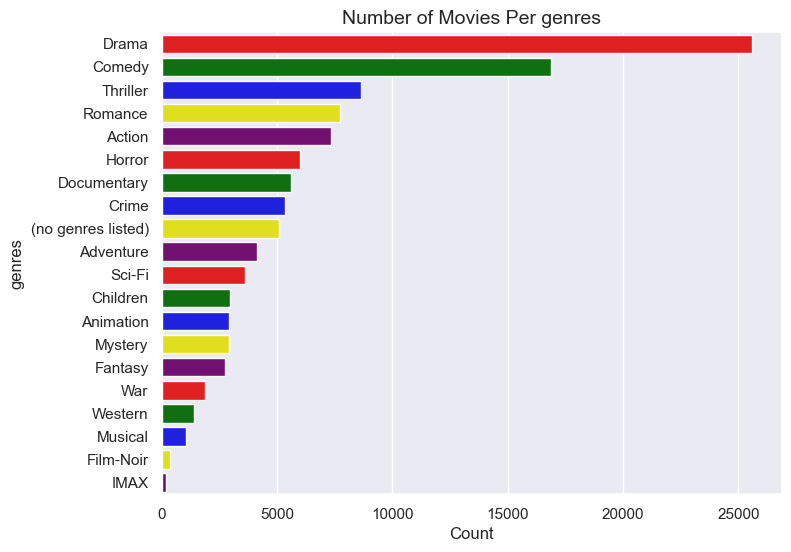

In [53]:
def feature_count(df, column):
    plt.figure(figsize=(8,6))
    # Define a list of colors for each bar
    colors = ['red', 'green', 'blue', 'yellow', 'purple'] # Add or modify colors as needed
    ax = sns.barplot(y=df[f'{column}'], x=df['count'], palette=colors, orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()
feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

## Investigating columns with null values

We will have to see how much of the columns from the data which were found to have nulls is missing and if these missing values can be fixed by filling them in anyway or if they have to be dropped later on in the data handling phase

In [54]:
#to check the percantage of missing data
director_nulls= imdb_df['director'].isnull().mean()
runtime_nulls= imdb_df['runtime'].isnull().mean()
tmdbId_nulls= links_df['tmdbId'].isnull().mean()
tag_nulls= tags_df['tag'].isnull().mean()
plot_keywords_nulls= imdb_df['plot_keywords'].isnull().mean()
budget_nulls= imdb_df['budget'].isnull().mean()
# print the percentage of missing data
print("Percentage of missing data in column 'director': {:.2f}%".format(director_nulls*100))
print("Percentage of missing data in column 'runtime': {:.2f}%".format(runtime_nulls*100))
print("Percentage of missing data in column 'budget': {:.2f}%".format(budget_nulls*100))
print("Percentage of missing data in column 'plot_keywords': {:.2f}%".format(plot_keywords_nulls*100))
print("Percentage of missing data in column 'tag': {:.2f}%".format(tag_nulls*100))
print("Percentage of missing data in column 'tmdbId': {:.2f}%".format(tmdbId_nulls*100))

Percentage of missing data in column 'director': 36.20%
Percentage of missing data in column 'runtime': 44.32%
Percentage of missing data in column 'budget': 71.02%
Percentage of missing data in column 'plot_keywords': 40.61%
Percentage of missing data in column 'tag': 0.00%
Percentage of missing data in column 'tmdbId': 0.17%


A noticeable chunk of the columns with missing data actually has missing data, with an exception of the 'tag' and the 'tmdbId' column, as it seems the missing values are negligible. This can be seen visually below in the bar chart. This will be addressed in the data handling.

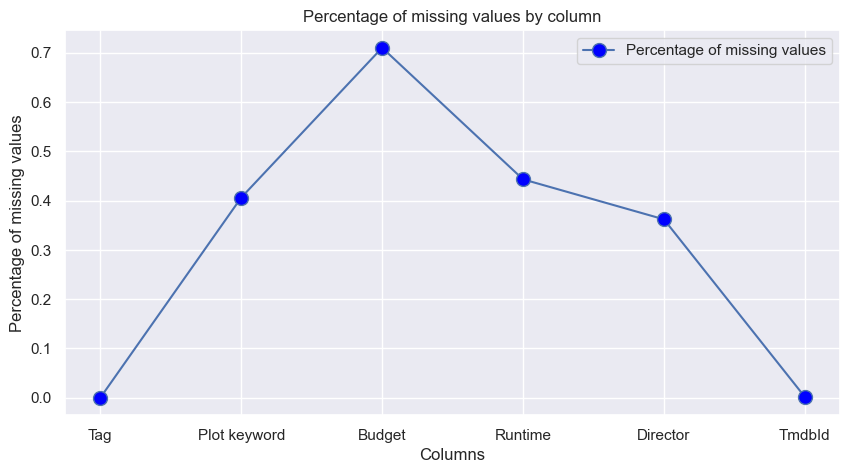

In [55]:
missing_data={'Tag': tag_nulls, 'Plot keyword': plot_keywords_nulls, 'Budget': budget_nulls,
              'Runtime': runtime_nulls, 'Director': director_nulls, 'TmdbId':tmdbId_nulls}
missing_data = pd.DataFrame(list(missing_data.items()),columns= ['Columns', 'Percentage of missing values'])

missing_data.plot(kind='line',x='Columns',y='Percentage of missing values',  
                  marker='o', linestyle='-', markersize=10, markerfacecolor='blue', figsize=(10, 5))
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values by column')
plt.show()

For more visuals, one would perhaps want to see what relationships can be infered from the data sets or what relationships could be interesting to explore. This will require some creative thinking since some key columns such as budget and runtime are missing a significant amount of data

<a id="six"></a>
## 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

Feature engineering is a crucial step in the process of building machine learning models. It involves transforming raw data into a format that is more suitable and informative for the specific task at hand. By creating new features or modifying existing ones, feature engineering aims to extract relevant information and enhance the predictive power of the model.

Cleaned text isn’t enough to be passed directly to the classification model. The features need to be numeric not strings. There are many state-of-art approaches to extract features from the text data.

For this project we will be using an equivelant to CountVectorizer, TfidfVectorizer. TfidfVectorizer is a tool that helps you convert text into numbers that can be used in machine learning models. It does this by counting the number of times each word appears in a document and then weighting these counts by how often each word appears across all documents. This gives you a way to represent each document as a vector of numbers that can be used as input to machine learning algorithms.

From the Exploratory Data Analysis, the columns from the imdb data are lacking a significant amount of information. In this phase of the project, it is important to drop those columns. At this point, it's important to remember that the aim of the project is to build a recommender for both  content based filtering and collaborative based filtering. This will have to be kept in mind when changes are made. for instance, for content based filtering, columns such as genre, actors, director and budget might prove vital. hence it would not be adviseable to drop the the columns from the imdb dataframe completely. to deal with the missing values found in the EDA, dropping the rows with empty columns would be more productive so as to keep the information.

In [56]:
#to drop the empty rows
imdb_df.dropna(inplace=True)

Another thing that is visible is the plot keywords and title actor columns have the names mixed up, this might cause issues in the data not being properly displayed. To solve this, spliting the words using the split method would make the information more accessible. However the Imdb dataframe is not the only one with this issue, the column genre from also has the same issue. The same remedy will be applied to it as well.

In [57]:
#splitting the data from imdb data
imdb_df[['plot_keywords', 'title_cast']] = imdb_df[['plot_keywords', 'title_cast']].apply(lambda x: x.str.split('|'))
imdb_df = imdb_df.explode('plot_keywords')
imdb_df = imdb_df.explode('title_cast')

In [58]:
#separating any null values
movies_df = movies_df[~movies_df["genres"].isnull()]
#splitting the genre column
movies_df["genres"] = movies_df["genres"].str.split("|")
movies_df = movies_df.explode("genres")

When looking at the title column from movies, the movie names are structured in a way whereby it is 'movie_name (year of release)'. this might prove inconvinient when searching for a movie, so extracting the year of release and removing it from the data could save time and make the code run more efficiently.

In [59]:
movies_df['title'] = movies_df['title'].str.extract('(.*) \(.*\)', expand=False)

Once these columns have been dealt with, the next step is moving into creating dataframe that would be suitable for the purposes of this project. First, since this is an unsupervised machine learning project, the df_test does not have a rating column, to create it below. Secondly, the timestamp column from df_train does not serve a purpose when it come to getting the ratings, so we'll have to drop it.

In [60]:
test_df['rating'] = test_df.assign(rating=None)['rating'].astype(float)
test_df

,userId,movieId,rating
0,1,2011,NaN
1,1,4144,NaN
2,1,5767,NaN
3,1,6711,NaN
4,1,7318,NaN
...,...,...,...
5000014,162541,4079,NaN
5000015,162541,4467,NaN
5000016,162541,4980,NaN
5000017,162541,5689,NaN


In [61]:
#dropping the timestamp column
train_df = train_df.drop(['timestamp'], axis=1)

We must avoid at all costs having unnecessary data cluttering up the models. Below, we create a new dataframe specifically for the content based filtering. 

In [62]:
#feautures we want to keep
movies_genre = movies_df[['movieId','genres', 'title']]
cast = imdb_df[['movieId', 'title_cast']]
# Group the data by movieId in both dataframes
movies_genre = movies_genre.groupby('movieId').agg({'genres': '|'.join, 'title': 'first'})
cast = cast.groupby('movieId').agg({'title_cast': '|'.join})
# Merge the grouped dataframes on movieId
df_train2 = pd.merge(train_df, movies_genre, on='movieId', how='left')
df_train2 = pd.merge(df_train2, cast, on='movieId', how='left')
df_train2

,userId,movieId,rating,genres,title,title_cast
0,5163,57669,4.0,Comedy|Crime|Drama|Thriller,In Bruges,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...
1,106343,5,4.5,Comedy,Father of the Bride Part II,Steve Martin|Diane Keaton|Martin Short|Kimberl...
2,146790,5459,5.0,Action|Comedy|Sci-Fi,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...
3,106362,32296,2.0,Adventure|Comedy|Crime,Miss Congeniality 2: Armed and Fabulous,Sandra Bullock|Regina King|Enrique Murciano|Wi...
4,9041,366,3.0,Drama|Horror|Mystery|Thriller,Wes Craven's New Nightmare (Nightmare on Elm S...,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...
...,...,...,...,...,...,...
10000033,136395,99114,5.0,Action|Drama|Western,Django Unchained,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...
10000034,140078,553,3.0,Action|Drama|Western,Tombstone,Kurt Russell|Val Kilmer|Sam Elliott|Bill Paxto...
10000035,154807,56782,4.0,Drama|Western,There Will Be Blood,Daniel Day-Lewis|Martin Stringer|Matthew Brade...
10000036,85805,327,4.0,Action|Comedy|Sci-Fi,Tank Girl,Lori Petty|Ice-T|Naomi Watts|Don Harvey|Jeff K...


With the data engineering part done, the exploration of the data can continue.

Exploring the kind of relationships that can be displayed once the data is cleaned. Now features which were not able to be displayed prior to cleaning such as the top rated genres in general can be easily displayed. 

Below the top 20 highly rated genres is displayed.

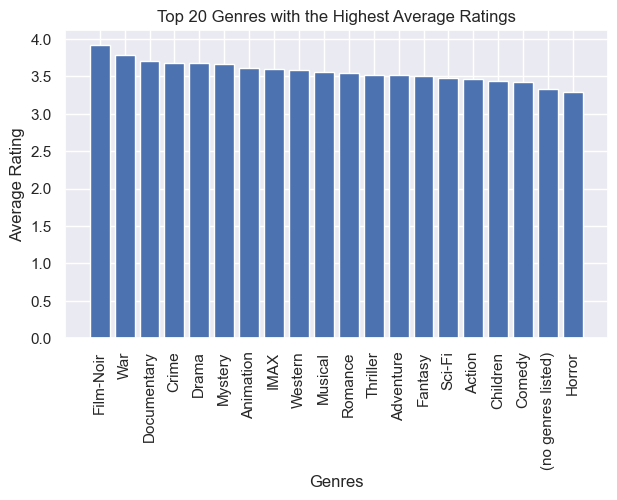

In [63]:
# Join the two dataframes based on the common column movieId
merged_df = pd.merge(train_df, movies_df, on='movieId')
# Group the data by the genres column and calculate the mean rating for each genre
genre_ratings = merged_df.groupby('genres')['rating'].mean().reset_index()
# Sort the data by mean rating in descending order
genre_ratings = genre_ratings.sort_values('rating', ascending=False)
# Keep only the top n genres
n = 20
genre_ratings = genre_ratings.head(n)

# Plot the genres with the highest ratings
plt.figure(figsize=(7, 4))
plt.bar(genre_ratings['genres'], genre_ratings['rating'])
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title(f'Top {n} Genres with the Highest Average Ratings')
plt.xticks(rotation=90)
plt.show()

From the graph, it becomes clear that novelty genres like Film Noir and War are the two most highly rated genres. It could be a play into the rarity and the unusualness of the films. Also seeing documentary, crime and drama in the top 5 most rated genres is quite intersting and could tell what the public is generally interested in. This can be used by executives to see which movies to direct or for companies that stream movies, what kind of movies to include more in their plartfom.

With this said, which movies have on average the highest ratings?
below, the top 20 films with the highest ratings are displayed.

In [64]:
#Join the two dataframes based on the common column movieId
merged_df = pd.merge(train_df, movies_df, on='movieId')
#Group the data by the genres column and calculate the mean rating for each genre
genre_ratings = merged_df.groupby('title')['rating'].mean().reset_index()
#Sort the data by mean rating in descending order
genre_ratings = genre_ratings.sort_values('rating', ascending=False)
#Keep only the top n genres
n = 20
genre_ratings = genre_ratings.head(n)
#Display the genres with the highest ratings as a table
print(genre_ratings[['title', 'rating']])

                                                   title  rating
43666                                           What Now     5.0
22119                                         Lonely Boy     5.0
36260                                   The Big Exchange     5.0
8496                                           Convicted     5.0
5775                                  Bowery at Midnight     5.0
34446                             Storm - Letter of Fire     5.0
22131                               Lonesome Dove Church     5.0
38128                                    The Last Bullet     5.0
38127                     The Last Brickmaker in America     5.0
44949                               You, Me & the Circus     5.0
5786                               Boxers and Ballerinas     5.0
17409  How to Train Your Husband or (How to Pick Your...     5.0
1512             Adventures of Mowgli: Return to Mankind     5.0
38121                                      The Landlords     5.0
8505                     

Seeing the top 20 highest rated movies and genres, it would be interesting to see the directors relationships to the actors. Firstly seeing which directors have worked with the most actors overall, This is a great indicator to show who works well with others. Which in the long term, helps the investor gauge who they would like to invest in when it comes to directors. 

Below the top 25 directors with the most actors worked with is displayed.

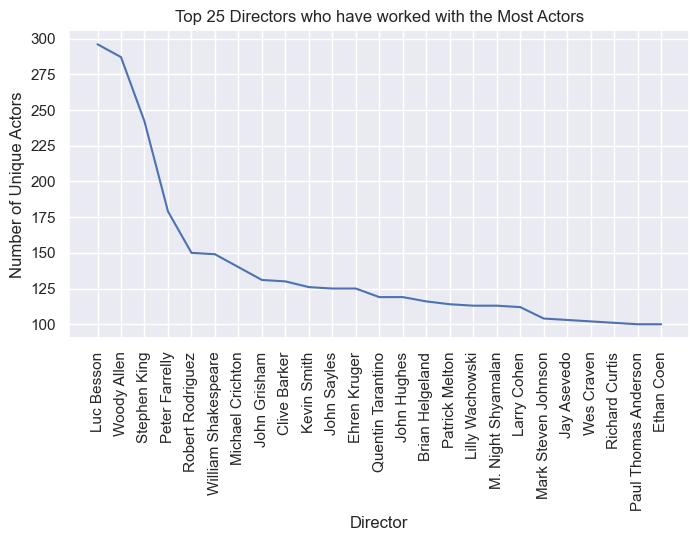

In [65]:
# Create a new dataframe that contains only the director, cast, and movieId columns
df_director_cast = imdb_df[['director', 'title_cast', 'movieId']]
# Group the data by the director and count the number of unique actors they have worked with
director_actor_counts = df_director_cast.groupby(['director'])['title_cast'].nunique().reset_index()
# Sort the data by the number of unique actors in descending order
director_actor_counts = director_actor_counts.sort_values('title_cast', ascending=False)
# Keep only the top 20 directors
top_25 = director_actor_counts.head(25)

# Plot the line graph
plt.figure(figsize=(8, 4))
plt.plot(top_25['director'], top_25['title_cast'])
plt.xlabel('Director')
plt.ylabel('Number of Unique Actors')
plt.title('Top 25 Directors who have worked with the Most Actors')
plt.xticks(rotation=90)
plt.show()

A few interesting insights come up, first to be noted is how the graph almost plateus around 125 actors. This could be due to the level of experience directors have or the willingness of actors to work with the directors. A funny observation is seeing how the list includes directors like classical playwright, actor and poet William Shakespeare. Who died in the year 1616

If that is the case, it might be intersting to see which actors have acted in the highest number of movies. This also helps in seeing who is more popular to work with which is a good sign because making movies is an art but still a business. You want to have the best possible cast, best director and the best production team.

To show the actors with the most movies, we use the following graph:

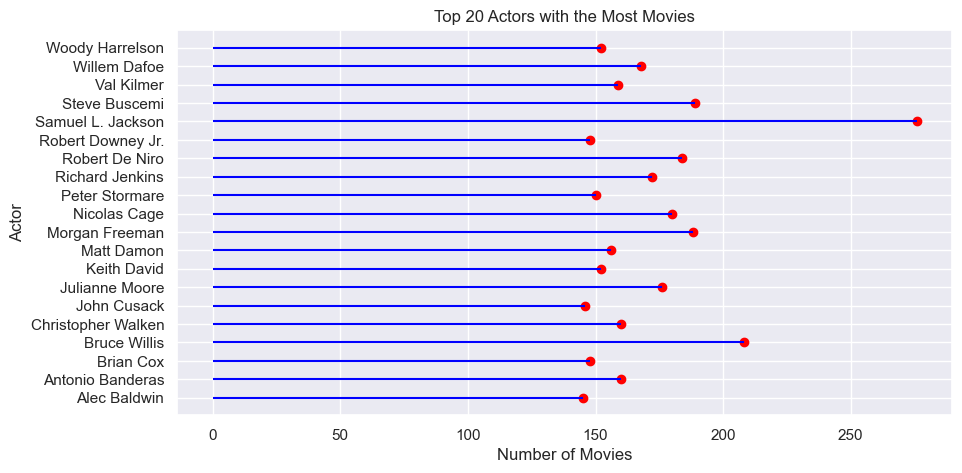

In [66]:
# Count the number of movies each actor appears in
actor_counts = imdb_df['title_cast'].value_counts()
# Only keep the top 20 actors
actor_counts = actor_counts.head(20)
# Sort the actors alphabetically
actor_counts = actor_counts.sort_index()

# Plot the data as a lollipop chart
plt.figure(figsize=(10,5))
plt.hlines(y=actor_counts.index, xmin=0, xmax=actor_counts.values, color='blue')
plt.scatter(x=actor_counts.values, y=actor_counts.index, color='red')
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.title("Top 20 Actors with the Most Movies")
plt.show()

From above, Samuel L. Jackson is the most popular actor  by a huge margin followed by Bruce Willis, who also leads by a sizable margin. This is a good indicator to show the actors experience and value. 

There are plenty of relationships that could be explored and displayed. It can really be done ad nauseam. With the visualisations done already. some key relationships can be drawn. But before closing off this part of the project. Let us look at the directors with the longest runtime. One can compare this with the number of actors a director has worked with. It can also show which directors are given the most creative freedom during filming.

to plot directors with the highest runtimes:

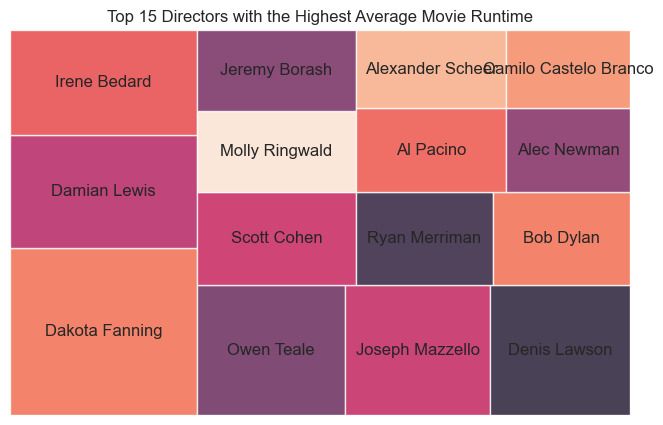

In [67]:
import squarify
import matplotlib.pyplot as plt

# Calculate the average runtime for each director
director_runtime = imdb_df.groupby("director")["runtime"].mean().reset_index()
# Sort the directors by average runtime in descending order
director_runtime = director_runtime.sort_values("runtime", ascending=False)
# Keep only the top 15 directors with the highest average runtime
director_runtime = director_runtime.head(15)

# Plot the Treemap
plt.figure(figsize=(8, 5))
squarify.plot(sizes=director_runtime["runtime"], label=director_runtime["director"], alpha=.8)
plt.axis('off')
plt.title("Top 15 Directors with the Highest Average Movie Runtime")
plt.show()

What is quite interesting to see is how the directors shown here are different from the directors who have worked with the most amount of actors. It could be drawn that a longer runtime is not popular amongst actor. Also runtime does affect production costs, meaning a movie needs to gross more for it to break even. Translating to a higher risk when it comes to the return of investment.

With the exploration of the data done, the project can continue to build the models and fit them

Create a dataset specifically designed for the development of word clouds and corpora.

In [106]:
df = imdb_df[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies_df[['movieId', 'genres', 'title']], on='movieId', how='inner')
df['year'] = df['title'].str.extract(r"\((\d+)\)", expand=False)

In [107]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces 
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes 
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))


# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))
df.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,tomhanks,johnlasseter,toy,adventure animation children comedy fantasy,Toy Story (1995),1995
1,1,timallen,johnlasseter,toy,adventure animation children comedy fantasy,Toy Story (1995),1995
2,1,donrickles,johnlasseter,toy,adventure animation children comedy fantasy,Toy Story (1995),1995
3,1,jimvarney,johnlasseter,toy,adventure animation children comedy fantasy,Toy Story (1995),1995
4,1,wallaceshawn,johnlasseter,toy,adventure animation children comedy fantasy,Toy Story (1995),1995


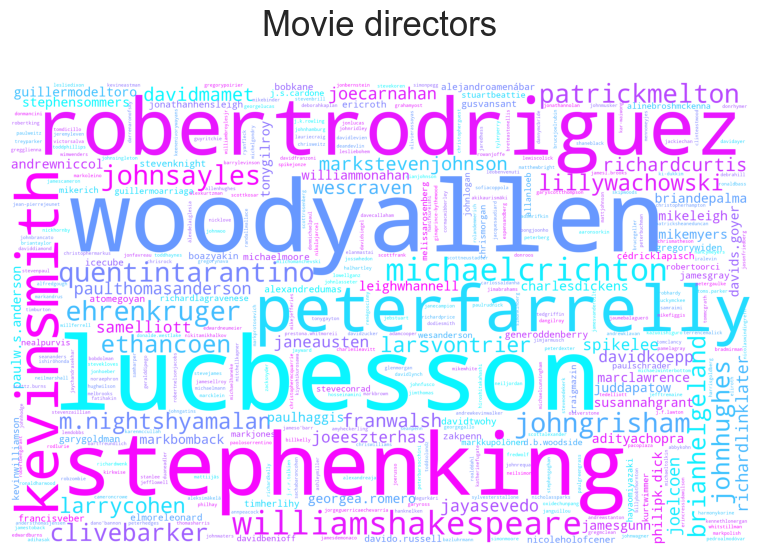

In [90]:
def wordcloud_generator(df, column):  
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # List of words that should be removed 
    removed = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in removed]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
            
    # Pair the keywords with their frequencies
    for word, word_freq in keyword_counts.items():
        keyword_pair.append((word, word_freq))
        
    # Sort the keywords according to their frequencies
    keyword_pair.sort(key=lambda x: x[1], reverse=True)
    
    # Prepare the data for word cloud generation
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a word cloud using the top 2000 keywords with modified colors
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='white',  # Change the background color here
                          colormap='cool',  # Change the colormap for the word cloud here
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0).generate_from_frequencies(words)

    return wordcloud 

# Generate a WordCloud using the movie directors  
directorc = wordcloud_generator(df, 'director')

# Plot the WordCloud 
f = plt.figure(figsize=(14, 6)) 
plt.imshow(directorc) 
plt.axis('off') 
plt.title('Movie directors\n', fontsize=25)
plt.show()

The established recognition of Lucbesson, Stephen King, Woody Allen, Ki-dukkim, and William Shakespeare as prominent directors is primarily based on the number of movies they have directed in the database. It should be noted that while William Shakespeare and Stephen King are renowned authors rather than directors, their literary works have been widely adapted into numerous movies.

<a id="seven"></a>
## 7. Model Training and Evaluation
<a href=#cont>Back to Table of Contents</a>

### Content-Based Filtering

The corpus for each film shall be formed by merging these columns, and subsequently, the similarity between films will be evaluated based on this corpus.

In [108]:
# Creating an empty column and list to store the corpus for each movie
df = df.head(100000)
df['corpus'] = ''
corpus = []


# columns of interest
columns = ['title_cast', 'director', 'plot_keywords', 'genres']

# For each movie, combine the contents of the selected columns to form it's unique corpus 
for i in range(0, len(df["movieId"])):
    words = ''
    for col in columns:
        words = words + df.iloc[i][col] + " "        
    corpus.append(words)

# Add the corpus information for each movie to the dataframe 
df['corpus'] = corpus
df.set_index('movieId', inplace=True)

# Drop the columns we don't need 
df.drop(columns=['title_cast', 'director', 'plot_keywords', 'genres'], inplace=True)

df.head(25)

,title,year,corpus
movieId,,,
1,Toy Story (1995),1995,tomhanks johnlasseter toy adventure animation ...
1,Toy Story (1995),1995,timallen johnlasseter toy adventure animation ...
1,Toy Story (1995),1995,donrickles johnlasseter toy adventure animatio...
1,Toy Story (1995),1995,jimvarney johnlasseter toy adventure animation...
1,Toy Story (1995),1995,wallaceshawn johnlasseter toy adventure animat...
1,Toy Story (1995),1995,johnratzenberger johnlasseter toy adventure an...
1,Toy Story (1995),1995,anniepotts johnlasseter toy adventure animatio...
1,Toy Story (1995),1995,johnmorris johnlasseter toy adventure animatio...
1,Toy Story (1995),1995,erikvondetten johnlasseter toy adventure anima...


### Vectorizing the content 

In [109]:
#create a vectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
vec = tf.fit_transform(df['corpus'])

In [110]:
cos_sim = cosine_similarity(vec, vec)
print(cos_sim.shape)
cos_sim[:6]

MemoryError: Unable to allocate 36.7 GiB for an array with shape (4922543944,) and data type int64

In [96]:
def get_topN_recommendations(title, n=10):
    """
    This function gets the top n recomended movies based on the 
    title of the movie input by the user 
    
    """ 
    df1 = df.reset_index()
    
    # Extract the movie titles
    titles = df1['title']
    indices = pd.Series(df1.index, index=df['title'])
    idx = indices[title]
    
    # Get the similarity scores of the top n movies most similar to the user input
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n]
    
    # Exctract the titles of the top n most similar movies  
    movie_indices = [i[0] for i in sim_scores]
    
    return titles.iloc[movie_indices]

get_topN_recommendations('Toy Story (1995)').head(10)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Collaborative-Based Filtering
The collaborative filtering method generates models using past user interactions and decisions taken by other users who have made similar actions.

The following algorithms from the Surprise library were utilized:

### Basic Algorithms:

- NormalPredictor: This algorithm makes predictions by randomly selecting ratings based on the assumed normal distribution of the training set.

- BaselineOnly: this algorithm predicts the baseline estimate for given user and item.

### k-NN algorithms
- KNNBasic: This is a basic collaborative filtering algorithm.

- KNNWithMeans: This is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

- KNNWithZScore: This is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

- KNNBaseline: This is a basic collaborative filtering algorithm taking into account a baseline rating.

### Matrix Factorization-based algorithms

- SVD: singular value decomposition (SVD) is a matrix factorization method that generalizes the eigendecomposition of a square matrix (n x n) to any matrix (n x m). SVD is similar to Principal Component Analysis (PCA), but more general.


- SVDpp: this algorithm is an extension of SVD that takes into account implicit ratings.

- NMF:Non-negative matrix factorization, also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements

- SlopeOne: Slope One is a family of algorithms used for collaborative filtering, introduced in a 2005 paper by Daniel Lemire and Anna Maclachlan. Arguably, it is the simplest form of non-trivial item-based collaborative filtering based on ratings. Their simplicity makes it especially easy to implement them efficiently while their accuracy is often on par with more complicated and computationally expensive algorithms

- Coclustering: is a collaborative filtering algorithm based on co-clustering.


#### Surprise MovieLens run with All the above Algorithms

In [75]:
# List of algorithms to evaluate
algo = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(),
        KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

# Load the movielens-100k dataset (download it if needed)
data2 = Dataset.load_builtin('ml-100k')

# Implementing algorithm for RMSE
algo_rmse = []
for a in algo:
    cross_valid = cross_validate(a, data2, measures=['RMSE'], cv=3)
    output = pd.DataFrame.from_dict(cross_valid).mean(axis=0)
    # Convert the algorithm name to a readable format
    output['Algorithm'] = str(a).split(' ')[0].split('.')[-1]
    algo_rmse.append(output)

surprise_results = pd.DataFrame(algo_rmse).set_index('Algorithm').sort_values('test_rmse')
print(surprise_results)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


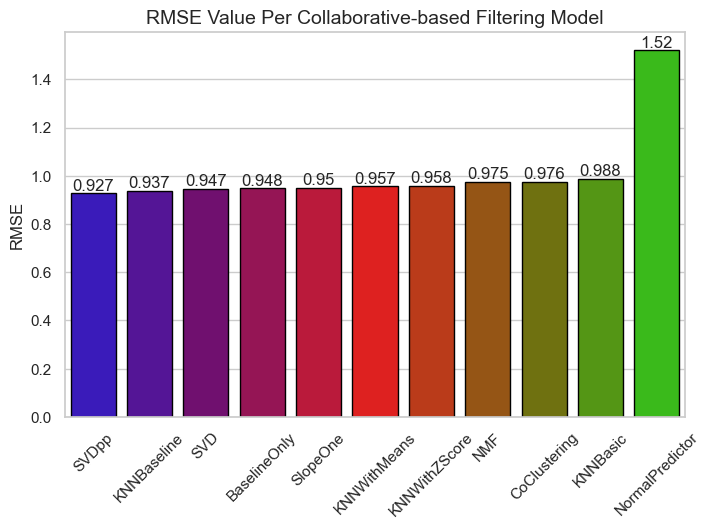

In [76]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVDpp','KNNBaseline','SVD','BaselineOnly', 'SlopeOne', 'KNNWithMeans','KNNWithZScore','NMF',
          'CoClustering','KNNBasic','NormalPredictor']
rmse_y = [0.926883,0.936598,0.946591,0.947660,0.950195,0.956625,
          0.957817,0.975043,0.976045,0.987697,1.520192]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='brg',edgecolor='black')
plt.title('RMSE Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
    
plt.show()

Based on the results, it's evident that KNNBaseline, SVDPP, and SVN are the top-performing models overall. While KNNbaseline ranks second with an RMSE of 0.926883, both it and SVDPP are computationally intensive. As a more efficient approach, we will apply the SVD technique on the entire dataset.

### Predicting our data with SVD algorithm

In [43]:
# Run on the subset of the train data to illustrate the model performance 
from surprise.model_selection import train_test_split
train  = pd.read_csv('Dataset/train.csv')

In [44]:
#Loading 100000 dataset
data4 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(100000), Reader()) 

In [45]:
trainset, testset = train_test_split(data4, test_size=0.05)

In [46]:
from surprise import accuracy
#SVD model
svd=SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svd.fit(trainset)

# Making prediction on the validation dataset
test_pred= svd.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

RMSE: 0.9762


Let's train the svd on the whole dataset

In [81]:
# Create a Surprise Dataset from the train data
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

In [82]:
# Use SVD algorithm
svd1 = SVD()

# Train the model on the full dataset
trainset = train_dataset.build_full_trainset()
svd1.fit(trainset)

In [83]:
# For evaluation, split the dataset into train and test sets
trainset, testset = train_test_split(train_dataset, test_size=0.2)

In [43]:
# Test the model on the test set
predictions = svd1.test(testset)

In [44]:
# Calculate RMSE (Root Mean Squared Error) for evaluation (optional)
rmse = accuracy.rmse(predictions)
print("RMSE:", rmse)

RMSE: 0.6638
RMSE: 0.6638345062547365


### Hyperparameter tuning - SVD on the whole training dataset 

In [ ]:
df = pd.read_csv('Dataset/train.csv')

In [ ]:
reader = Reader(rating_scale=(0, 5))

In [ ]:
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']].head(100000), reader)

In [ ]:
from surprise.model_selection import GridSearchCV
from surprise import dataset
import cloudpickle

# Load the movielens-100k dataset (download it if needed)
data = Dataset.load_builtin('ml-100k')

param_grid = {'n_epochs':[40,50], 
              'n_factors':[300,400], 
               'init_std_dev':[0.001, 0.005], 
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, 
                        n_jobs=4, joblib_verbose=10, refit="rmse")
grid_SVD.fit(data)
print('Best Score is: ')
print(grid_SVD.best_score['rmse'])
print('Best Parameters are: ')
print(grid_SVD.best_params['rmse'])

Removing outliers

In [ ]:
train_df = pd.read_csv('Dataset/train.csv')
train_df.drop(train_df.index[train_df['userId'] == 72315], inplace=True)
train_df = train_df.reset_index(drop=True)

In [ ]:
# A reader is still needed but only the rating_scale parameter is required.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data3= Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(5000019), reader)# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data3, test_size=.25)

# Use the SVD algorithm.
algo2 = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

After removing the outlier, the model's performance improves from 0.9677 on the sample trainset to 0.9664. Consequently, we will apply this outlier removal technique to the entire dataset for the Kaggle submission.

In [ ]:
# Train model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42, verbose=True)
svd.fit(trainset)

##### Review of SVD's performance

In [ ]:
# Compare RMSE of SVD of different versions of the dataset
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVD_surprise', 'SVD_sample', 'SVD_hypertuned_sample', 'SVD_engineered sample', 'SVD_whole_dataset']
rmse_y = [0.926883,0.9789,0.9677,0.9664,0.78525]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='brg',edgecolor='black')
plt.title('RMSE Value of SVD on different versions of the dataset',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
    
plt.show()

<a id="eight"></a>
## 8. Model Testing
<a href=#cont>Back to Table of Contents</a>

In [62]:
# Create a Surprise Dataset from the test data
test_df['rating'] = 0
test_dataset = Dataset.load_from_df(test_df[['userId', 'movieId', "rating"]], reader)

In [63]:
# Build testset
testset = test_dataset.build_full_trainset().build_testset()

In [64]:
# Make predictions on the test data
test_predictions = svd1.test(testset)

<a id="nine"></a>
## 9. Saving Model for Kaggle Submission
<a href=#cont>Back to Table of Contents</a>

In [71]:
sample = pd.read_csv("Dataset/sample_submission.csv")
sample.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [87]:
# Extract the predicted ratings from the test_predictions
test_result = pd.DataFrame([[pred.uid, pred.iid, pred.est] for pred in test_predictions], columns=['userId', 'movieId', 'rating'])
test_result['Id'] = test_result['userId'].astype(str) + '_' + test_result['movieId'].astype(str)

In [97]:
id_col = test_result.pop('Id')
test_result.insert(1,"Id",id_col)
results=test_result.drop(columns=["userId", "movieId"])
results

,Id,rating
0,1_2011,3.065417
1,1_4144,4.303581
2,1_5767,3.772963
3,1_6711,4.156721
4,1_7318,3.187977
...,...,...
5000014,162541_4079,3.302140
5000015,162541_4467,3.642702
5000016,162541_4980,2.611519
5000017,162541_5689,2.803516


In [98]:
# Save the test result to a CSV file
results.to_csv('test_result.csv', index=False)

<a id="ten"></a>
## 10. Saving Model for Streamlit App
<a href=#cont>Back to Table of Contents</a>

In [47]:
model_save_path = "svd.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svd,file)

<a id="eleven"></a>
## 11. Conclusion
<a href=#cont>Back to Table of Contents</a>

This notebook explores various recommendation techniques, including collaborative filtering, content-based filtering, and hybrid approaches. It demonstrates their effectiveness in delivering personalized suggestions to users based on their preferences and item attributes. The evaluation metrics, such as precision, recall, and MAE, were used to assess model performance. Data preprocessing techniques were applied to improve recommendation quality. The success of the recommender system depends on the quality and size of the dataset. Overall, the notebook provides a solid foundation for building recommender systems in different domains and emphasizes the importance of continuous research and data quality improvement to enhance personalized user experiences.

<a id="twelve"></a>
## 12. Recommendations
<a href=#cont>Back to Table of Contents</a>

**Based on the findings and outcomes, here are some recommendations to further improve and enhance the system:**

* **Explore Matrix Factorization Techniques:** Matrix factorization methods, such as Singular Value Decomposition (SVD) and Alternating Least Squares (ALS), can be investigated further. These techniques often perform well in collaborative filtering scenarios and might provide more accurate recommendations.

* **Consider Deep Learning Approaches:** Investigate the potential of deep learning models, such as neural collaborative filtering or transformer-based architectures, for recommendation tasks. These models can capture complex patterns in user-item interactions and might lead to more sophisticated and accurate recommendations.

* **Incorporate Contextual Information:** If available, consider integrating contextual information like time, location, or user behavior patterns into the recommendation process. This additional data can help make recommendations more relevant and timely.

* **Implement Real-time Recommendations:** Explore ways to make real-time recommendations by using stream processing frameworks. Users' preferences and behavior might change rapidly, and providing up-to-date suggestions can enhance the user experience.

* **Experiment with Diversity and Serendipity:** Encourage diversity in recommendations to expose users to a broader range of items. Additionally, implement techniques that introduce serendipity in recommendations to surprise users with relevant yet unexpected suggestions.
